# Introduction to data

The dataset consists of product reviews and metadata of products in the "Grocery and Gourmet Food" category on Amazon and was collected by researchers at UCSD.

The original reviews dataset has 142.8 million reviews spanning from May 1996 - July 2014. However, we use only use a subset of the dataset where all users and items have at least 5 reviews in the "Grocery and Gourmet Food" category, called food 5-core. The food 5-core dataset is 108 MB and contains 151,254 reviews, with each review having 9 attributes:

- <code>reviewerID</code> - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- <code>asin </code> - ID of the product, e.g. 0000013714
- <code>reviewerName </code> - name of the reviewer
- <code>helpful </code> - helpfulness rating of the review, e.g. 2/3
- <code>reviewText </code> - text of the review
- <code>overall </code> - rating of the product
- <code>summary </code> - summary of the review
- <code>unixReviewTime </code> - time of the review (unix time)
- <code>reviewTime </code> - time of the review (raw)

The metadata dataset contains metadata for 171,761 products in the "Gorcery and Gourmet Food" category and is 182 MB. Each product has 9 attributes:

- <code>asin </code> - ID of the product, e.g. 0000031852
- <code>title </code> - name of the product
- <code>price </code> - price in US dollars (at time of crawl)
- <code>imUrl </code> - url of the product image
- <code>related </code> - related products (also bought, also viewed, bought together, buy after viewing)
- <code>salesRank </code> - sales rank information
- <code>brand </code> - brand name
- <code>categories </code> - list of categories the product belongs to

# Project Idea

Text part:
Concatenate all review texts for the same product and compute the sentiment happiness. Then we compare the happiness score with the average rating of the product. Then we want to compute the linear correlation with Pearson's test. 

We would also like to analyse the sentiment and ratings across different categories, with word clouds for some of the categories.

Network part:
We want to analyse the products and how they are related, with products as nodes and a link between them if they are related. Each product has a category, e.g. ``beverage``, ``baby food``, ``canned dry and packed foods`` etc, so we can visualise communities. Furthermore, we can experiment if the Louvain algorithm can find a equivalent partition of the network. 

Additionally, we want to make a network of users as nodes and products reviewed in common as vertices. Then, we want to compare this network with a randomly generate network with the same clustering coefficient. 

# Explore data

In [1]:
import pandas as pd
import json
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

def parse2(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF2(path):
    i = 0
    df = {}
    for d in parse2(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [3]:
review_df = getDF('data/reviews_Grocery_and_Gourmet_Food_5.json.gz')
review_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4.0,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4.0,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5.0,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4.0,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"
...,...,...,...,...,...,...,...,...,...
151249,A2L6QS8SVHT9RG,B00KCJRVO2,"randomartco ""period film aficionado""","[0, 0]",Delicious gluten-free oatmeal: we tried both t...,4.0,Delicious gluten-free oatmeal 'quick' packs!,1405123200,"07 12, 2014"
151250,AFJFXN42RZ3G2,B00KCJRVO2,"R. DelParto ""Rose2""","[0, 0]",With the many selections of instant oatmeal ce...,4.0,Convenient and Instant,1404604800,"07 6, 2014"
151251,ASEBX8TBYWQWA,B00KCJRVO2,"Steven I. Ramm ""Steve Ramm &#34;Anything Phon...","[1, 1]","While I usually review CDs and DVDs, as well a...",5.0,Compares favorably in taste and texture with o...,1404172800,"07 1, 2014"
151252,ANKQGTXHREOI5,B00KCJRVO2,Titanium Lili,"[0, 1]",My son and I enjoyed these oatmeal packets. H...,4.0,Pretty good!,1404432000,"07 4, 2014"


In [21]:
review_df['overall'][review_df['asin'] == '616719923X'].mean()

4.0625

In [4]:
product_df = getDF2('data/meta_Grocery_and_Gourmet_Food.json.gz')
product_df

,asin,description,title,imUrl,related,salesRank,categories,price,brand
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,http://ecx.images-amazon.com/images/I/41gFi5h0...,{'also_viewed': ['B001GE8N4Y']},{'Grocery & Gourmet Food': 374004},[[Grocery & Gourmet Food]],NaN,NaN
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,http://ecx.images-amazon.com/images/I/51hs8sox...,NaN,{'Grocery & Gourmet Food': 620307},[[Grocery & Gourmet Food]],NaN,NaN
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,http://ecx.images-amazon.com/images/I/518SEST5...,NaN,NaN,[[Grocery & Gourmet Food]],3.99,NaN
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,http://ecx.images-amazon.com/images/I/51CFQIis...,{'also_viewed': ['B0051IETTY']},{'Grocery & Gourmet Food': 620322},[[Grocery & Gourmet Food]],NaN,NaN
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,http://ecx.images-amazon.com/images/I/51EUsMcn...,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",{'Grocery & Gourmet Food': 268754},[[Grocery & Gourmet Food]],11.99,Mio
...,...,...,...,...,...,...,...,...,...
171755,B00LDXFI6Y,Nescafe Cafe Viet is extracted from the aromat...,Nescafe Cafe Viet Vietnamese Sweetened Instant...,http://ecx.images-amazon.com/images/I/51qAGS7j...,{'also_viewed': ['B000DN8EZW']},NaN,[[Grocery & Gourmet Food]],17.99,NaN
171756,B00LMMLRG6,Moon Cheese Snacks Moon Cheese High in protein...,"Moon Cheese, 2 Oz. Pack of Three (Assortment)",http://ecx.images-amazon.com/images/I/419FO438...,{'also_viewed': ['B000UPFWW6']},{'Grocery & Gourmet Food': 54090},[[Grocery & Gourmet Food]],16.95,NaN
171757,B00LOXAZ1Q,Sour Punch candy is the brand of mouth waterin...,"Sour Punch Blue Raspberry Bite, 5 Ounce Bag --...",http://ecx.images-amazon.com/images/I/31Cj3cHD...,NaN,{'Grocery & Gourmet Food': 133517},[[Grocery & Gourmet Food]],16.55,NaN
171758,B00LOZ7F0S,"Our Vanilla Extract made from\nPremium, Organi...",Organic Mexican Vanilla,http://ecx.images-amazon.com/images/I/11iORwy7...,NaN,NaN,[[Grocery & Gourmet Food]],NaN,NaN


In [45]:
np.unique(product_df['categories'])

array([list([['CDs & Vinyl', 'Blues', 'Piano Blues'], ['CDs & Vinyl', 'Pop', 'Oldies'], ['CDs & Vinyl', 'Pop', 'Singer-Songwriters'], ['CDs & Vinyl', 'R&B', 'Classic R&B'], ['CDs & Vinyl', 'Rock', 'Oldies & Retro'], ['Grocery & Gourmet Food', 'Beverages']]),
       list([['CDs & Vinyl', 'Country', 'Bluegrass'], ['Grocery & Gourmet Food', 'Beverages']]),
       list([['CDs & Vinyl', 'Country', 'Roadhouse Country'], ['CDs & Vinyl', 'Country', "Today's Country"], ['CDs & Vinyl', 'World Music', 'Europe', 'Continental Europe', 'Germany'], ['Grocery & Gourmet Food', 'Snack Foods', 'Salsas, Dips & Spreads', 'Dips & Spreads', 'Ranch']]),
       list([['CDs & Vinyl', 'Country', "Today's Country"], ['CDs & Vinyl', 'Pop'], ['Grocery & Gourmet Food', 'Cooking & Baking']]),
       list([['CDs & Vinyl', 'Pop'], ['CDs & Vinyl', 'R&B', 'Neo-Soul'], ['CDs & Vinyl', 'Rock'], ['Grocery & Gourmet Food', 'Candy & Chocolate', 'Gummy Candy']]),
       list([['CDs & Vinyl', 'Pop'], ['CDs & Vinyl', 'Rock'], ['

In [54]:
for i in range(len(product_df)):
    if product_df['categories'].iloc[i] == [['CDs & Vinyl', 'Country', 'Bluegrass'], ['Grocery & Gourmet Food', 'Beverages']]:
        print(i)
        break

11413


In [56]:
product_df.iloc[11413]

asin                                                  B000E5R30G
description    Themed recipes and music make cooking simple a...
title                  Wine Tasting-Sharon O'connor's Musiccooks
imUrl          http://ecx.images-amazon.com/images/I/41lbj4np...
related        {'also_bought': ['B000VGFA2Q', 'B000VGDDOI', '...
salesRank                                      {'Music': 224147}
categories     [[CDs & Vinyl, Country, Bluegrass], [Grocery &...
price                                                      14.37
brand                                                 Brookstone
Name: 11413, dtype: object

In [55]:
for i in range(len(product_df)):
    if product_df['categories'].iloc[i] == [['Grocery & Gourmet Food', 'Beverages', 'Powdered Drink Mixes', 'Soft Drink Mixes'], ['Clothing, Shoes & Jewelry', 'Women', 'Handbags & Wallets']]:
        print(i)
        break


144739


In [53]:
product_df.iloc[144739]

asin                                                  B00BFQ1VEW
description                                                  NaN
title            Anne Klein Tropical Punch Tote,Natural,One Size
imUrl          http://ecx.images-amazon.com/images/I/51PB8qMm...
related        {'also_bought': ['B00BML9P5M', 'B00C96U4TK'], ...
salesRank                                   {'Clothing': 423371}
categories     [[Grocery & Gourmet Food, Beverages, Powdered ...
price                                                        NaN
brand                                                        NaN
Name: 144739, dtype: object

Verify that there indeed are at least 5 reviews for each user and product.

In [5]:
import numpy as np
from collections import Counter

In [6]:
asin_counts = Counter(list(review_df['asin']))
reviewerID_counts = Counter(list(review_df['reviewerID']))
# print(asin_counts)
# print(reviewerID_counts)

# Preprocess

In [18]:
product_df

,asin,description,title,imUrl,related,salesRank,categories,price,brand
0,0657745316,This is real vanilla extract made with only 3 ...,100 Percent All Natural Vanilla Extract,http://ecx.images-amazon.com/images/I/41gFi5h0...,{'also_viewed': ['B001GE8N4Y']},{'Grocery & Gourmet Food': 374004},[[Grocery & Gourmet Food]],NaN,NaN
1,0700026444,"Silverpot Tea, Pure Darjeeling, is an exquisit...",Pure Darjeeling Tea: Loose Leaf,http://ecx.images-amazon.com/images/I/51hs8sox...,NaN,{'Grocery & Gourmet Food': 620307},[[Grocery & Gourmet Food]],NaN,NaN
2,1403796890,Must have for any WWE Fan\n \n \n \nFeaturing ...,WWE Kids Todler Velvet Slippers featuring John...,http://ecx.images-amazon.com/images/I/518SEST5...,NaN,NaN,[[Grocery & Gourmet Food]],3.99,NaN
3,141278509X,Infused with Vitamins and Electrolytes Good So...,Archer Farms Strawberry Dragonfruit Drink Mix ...,http://ecx.images-amazon.com/images/I/51CFQIis...,{'also_viewed': ['B0051IETTY']},{'Grocery & Gourmet Food': 620322},[[Grocery & Gourmet Food]],NaN,NaN
4,1453060375,MiO Energy is your portable energy source givi...,Mio Energy Liquid Water Enhancer Black Cherry ...,http://ecx.images-amazon.com/images/I/51EUsMcn...,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",{'Grocery & Gourmet Food': 268754},[[Grocery & Gourmet Food]],11.99,Mio
...,...,...,...,...,...,...,...,...,...
171755,B00LDXFI6Y,Nescafe Cafe Viet is extracted from the aromat...,Nescafe Cafe Viet Vietnamese Sweetened Instant...,http://ecx.images-amazon.com/images/I/51qAGS7j...,{'also_viewed': ['B000DN8EZW']},NaN,[[Grocery & Gourmet Food]],17.99,NaN
171756,B00LMMLRG6,Moon Cheese Snacks Moon Cheese High in protein...,"Moon Cheese, 2 Oz. Pack of Three (Assortment)",http://ecx.images-amazon.com/images/I/419FO438...,{'also_viewed': ['B000UPFWW6']},{'Grocery & Gourmet Food': 54090},[[Grocery & Gourmet Food]],16.95,NaN
171757,B00LOXAZ1Q,Sour Punch candy is the brand of mouth waterin...,"Sour Punch Blue Raspberry Bite, 5 Ounce Bag --...",http://ecx.images-amazon.com/images/I/31Cj3cHD...,NaN,{'Grocery & Gourmet Food': 133517},[[Grocery & Gourmet Food]],16.55,NaN
171758,B00LOZ7F0S,"Our Vanilla Extract made from\nPremium, Organi...",Organic Mexican Vanilla,http://ecx.images-amazon.com/images/I/11iORwy7...,NaN,NaN,[[Grocery & Gourmet Food]],NaN,NaN


In [19]:
asin_review_list = np.unique(list(review_df['asin']))

count = 0
related_products = []
rel = {}
idx = []
# loop over all products in product_df
for i in range(len(product_df)):
    asin = product_df.iloc[i]['asin']
    
    # if product is in the review df, find its related products.
    if asin in asin_review_list:
        related = product_df.iloc[i]['related']
        
        # check that the product has related items
        if str(related) != "nan":
            related_prod = []
            
            # loop over every key: also viewed, also bought, etc.
            for key in related.keys():
                # check that every related product is also in review_df
                for prod in related[key]:
                    if prod in asin_review_list:
                        related_prod.append(prod)
            rel[i] = related_prod
            related_products.append(related_prod)
        else:
            idx.append(i)
    
    else:
        idx.append(i)

In [32]:
# remove indices in original df
product_df2 = product_df.drop(idx)
# make a new column 
product_df3 = product_df2.assign(related_products = related_products)
# explode column related_products
product_df3 = product_df3.explode('related_products')
product_df3.to_csv("product_df3.csv", index=False)

Verify that the correct indices have been dropped :)

In [21]:
a = set(list(product_df2.index))
b = set(list(rel.keys()))

In [22]:
a - a.intersection(b)

set()

# Preprocess 2

In [57]:
review_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4.0,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4.0,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5.0,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4.0,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"
...,...,...,...,...,...,...,...,...,...
151249,A2L6QS8SVHT9RG,B00KCJRVO2,"randomartco ""period film aficionado""","[0, 0]",Delicious gluten-free oatmeal: we tried both t...,4.0,Delicious gluten-free oatmeal 'quick' packs!,1405123200,"07 12, 2014"
151250,AFJFXN42RZ3G2,B00KCJRVO2,"R. DelParto ""Rose2""","[0, 0]",With the many selections of instant oatmeal ce...,4.0,Convenient and Instant,1404604800,"07 6, 2014"
151251,ASEBX8TBYWQWA,B00KCJRVO2,"Steven I. Ramm ""Steve Ramm &#34;Anything Phon...","[1, 1]","While I usually review CDs and DVDs, as well a...",5.0,Compares favorably in taste and texture with o...,1404172800,"07 1, 2014"
151252,ANKQGTXHREOI5,B00KCJRVO2,Titanium Lili,"[0, 1]",My son and I enjoyed these oatmeal packets. H...,4.0,Pretty good!,1404432000,"07 4, 2014"


In [59]:
nodes = np.unique(list(review_df['reviewerID']))


14681

# Network

In [122]:
import networkx as nx

In [60]:
product_df3 = pd.read_csv("product_df3.csv")
product_df3

,asin,description,title,imUrl,related,salesRank,categories,price,brand,related_products
0,616719923X,Green Tea Flavor Kit Kat have quickly become t...,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,http://ecx.images-amazon.com/images/I/51LdEao6...,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",{'Grocery & Gourmet Food': 37305},[['Grocery & Gourmet Food']],NaN,NaN,B0047YG5UY
1,616719923X,Green Tea Flavor Kit Kat have quickly become t...,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,http://ecx.images-amazon.com/images/I/51LdEao6...,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",{'Grocery & Gourmet Food': 37305},[['Grocery & Gourmet Food']],NaN,NaN,B0002IZD02
2,616719923X,Green Tea Flavor Kit Kat have quickly become t...,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,http://ecx.images-amazon.com/images/I/51LdEao6...,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",{'Grocery & Gourmet Food': 37305},[['Grocery & Gourmet Food']],NaN,NaN,B004N8LMFM
3,616719923X,Green Tea Flavor Kit Kat have quickly become t...,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,http://ecx.images-amazon.com/images/I/51LdEao6...,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",{'Grocery & Gourmet Food': 37305},[['Grocery & Gourmet Food']],NaN,NaN,B0009F8JRC
4,616719923X,Green Tea Flavor Kit Kat have quickly become t...,Japanese Kit Kat Maccha Green Tea Flavor (5 Ba...,http://ecx.images-amazon.com/images/I/51LdEao6...,"{'also_bought': ['B00FD63L5W', 'B0047YG5UY', '...",{'Grocery & Gourmet Food': 37305},[['Grocery & Gourmet Food']],NaN,NaN,B004HU7TC6
...,...,...,...,...,...,...,...,...,...,...
380298,B00K00H9I6,Harvested from the iconic snowy woods of Quebe...,Canadian Finest Maple Syrup - 100% Pure Certif...,http://ecx.images-amazon.com/images/I/41abh7Ho...,"{'also_bought': ['B005P0LW66', 'B00JEKYNZA', '...",{'Grocery & Gourmet Food': 1500},[['Grocery & Gourmet Food']],18.95,NaN,B008RVURA2
380299,B00K00H9I6,Harvested from the iconic snowy woods of Quebe...,Canadian Finest Maple Syrup - 100% Pure Certif...,http://ecx.images-amazon.com/images/I/41abh7Ho...,"{'also_bought': ['B005P0LW66', 'B00JEKYNZA', '...",{'Grocery & Gourmet Food': 1500},[['Grocery & Gourmet Food']],18.95,NaN,B002483TSQ
380300,B00K00H9I6,Harvested from the iconic snowy woods of Quebe...,Canadian Finest Maple Syrup - 100% Pure Certif...,http://ecx.images-amazon.com/images/I/41abh7Ho...,"{'also_bought': ['B005P0LW66', 'B00JEKYNZA', '...",{'Grocery & Gourmet Food': 1500},[['Grocery & Gourmet Food']],18.95,NaN,B000LKXNG2
380301,B00KC0LGI8,NaN,"Betty Crocker Dry Meals Suddenly Grain Salad, ...",http://ecx.images-amazon.com/images/I/61zqxqJi...,"{'also_viewed': ['B00KSKIHVG', 'B00JWWM1T0', '...",{'Grocery & Gourmet Food': 97624},[['Grocery & Gourmet Food']],NaN,NaN,NaN


In [107]:
idx = []
categories = []
for i in range(len(product_df3)):
    if str(product_df3.iloc[i]['categories']) == str([['Grocery & Gourmet Food']]):
        idx.append(i)
    else:
        h = product_df3.iloc[i]['categories']
        h = h.replace("[","").replace("]","").replace(" '","").replace("'", "")
        h = h.split(",")
        
        categories.append(h[1])
        

In [111]:
# remove indices in original df
product_df4 = product_df3.drop(idx)
# make a new column
product_df5 = product_df4.assign(category=categories)
# explode column related_products
product_df5
product_df5.to_csv("product_df5.csv", index=False)

In [112]:
product_df5 = pd.read_csv("product_df5.csv")
product_df5

,asin,description,title,imUrl,related,salesRank,categories,price,brand,related_products,category
0,B00004S1C5,"From Easter eggs to colorful cookies, Spectrum...","Ateco Food Coloring Kit, 6 colors",http://ecx.images-amazon.com/images/I/41F75K9F...,"{'also_bought': ['B0000CFMLT', 'B002PO3KBK', '...",{'Kitchen & Dining': 4494},"[['Grocery & Gourmet Food', 'Cooking & Baking'...",9.76,HIC Harold Import Co.,B002PO3KBK,Cooking & Baking
1,B00004S1C5,"From Easter eggs to colorful cookies, Spectrum...","Ateco Food Coloring Kit, 6 colors",http://ecx.images-amazon.com/images/I/41F75K9F...,"{'also_bought': ['B0000CFMLT', 'B002PO3KBK', '...",{'Kitchen & Dining': 4494},"[['Grocery & Gourmet Food', 'Cooking & Baking'...",9.76,HIC Harold Import Co.,B000R4LONQ,Cooking & Baking
2,B00004S1C5,"From Easter eggs to colorful cookies, Spectrum...","Ateco Food Coloring Kit, 6 colors",http://ecx.images-amazon.com/images/I/41F75K9F...,"{'also_bought': ['B0000CFMLT', 'B002PO3KBK', '...",{'Kitchen & Dining': 4494},"[['Grocery & Gourmet Food', 'Cooking & Baking'...",9.76,HIC Harold Import Co.,B007F1MA46,Cooking & Baking
3,B00004S1C5,"From Easter eggs to colorful cookies, Spectrum...","Ateco Food Coloring Kit, 6 colors",http://ecx.images-amazon.com/images/I/41F75K9F...,"{'also_bought': ['B0000CFMLT', 'B002PO3KBK', '...",{'Kitchen & Dining': 4494},"[['Grocery & Gourmet Food', 'Cooking & Baking'...",9.76,HIC Harold Import Co.,B0001M0YK8,Cooking & Baking
4,B00004S1C5,"From Easter eggs to colorful cookies, Spectrum...","Ateco Food Coloring Kit, 6 colors",http://ecx.images-amazon.com/images/I/41F75K9F...,"{'also_bought': ['B0000CFMLT', 'B002PO3KBK', '...",{'Kitchen & Dining': 4494},"[['Grocery & Gourmet Food', 'Cooking & Baking'...",9.76,HIC Harold Import Co.,B0012DMI1S,Cooking & Baking
...,...,...,...,...,...,...,...,...,...,...,...
13541,B00JGPG60I,Enfamil Reguline is an everyday formula that g...,Enfamil Reguline Milk-Based Powder with Iron I...,http://ecx.images-amazon.com/images/I/510zYVQ8...,"{'also_bought': ['B003VKYGOM', 'B00CTKKB1C', '...",{'Health & Personal Care': 13464},"[['Grocery & Gourmet Food', 'Baby Foods', 'Bab...",16.00,Enfamil,B0039NMF9E,Baby Foods
13542,B00JGPG60I,Enfamil Reguline is an everyday formula that g...,Enfamil Reguline Milk-Based Powder with Iron I...,http://ecx.images-amazon.com/images/I/510zYVQ8...,"{'also_bought': ['B003VKYGOM', 'B00CTKKB1C', '...",{'Health & Personal Care': 13464},"[['Grocery & Gourmet Food', 'Baby Foods', 'Bab...",16.00,Enfamil,B003U9MCQI,Baby Foods
13543,B00JGPG60I,Enfamil Reguline is an everyday formula that g...,Enfamil Reguline Milk-Based Powder with Iron I...,http://ecx.images-amazon.com/images/I/510zYVQ8...,"{'also_bought': ['B003VKYGOM', 'B00CTKKB1C', '...",{'Health & Personal Care': 13464},"[['Grocery & Gourmet Food', 'Baby Foods', 'Bab...",16.00,Enfamil,B002IYDXW8,Baby Foods
13544,B00JGPG60I,Enfamil Reguline is an everyday formula that g...,Enfamil Reguline Milk-Based Powder with Iron I...,http://ecx.images-amazon.com/images/I/510zYVQ8...,"{'also_bought': ['B003VKYGOM', 'B00CTKKB1C', '...",{'Health & Personal Care': 13464},"[['Grocery & Gourmet Food', 'Baby Foods', 'Bab...",16.00,Enfamil,B000BIUH1I,Baby Foods


In [113]:
# group by asin and related_products
grouped_df = product_df5.groupby(["asin", "related_products"]).count()

grouped_df.index

MultiIndex([('B00004S1C5', 'B0000CFN0Y'),
            ('B00004S1C5', 'B0001BGTSA'),
            ('B00004S1C5', 'B0001M0YK8'),
            ('B00004S1C5', 'B0001XXB3E'),
            ('B00004S1C5', 'B000OZFECU'),
            ('B00004S1C5', 'B000R4LONQ'),
            ('B00004S1C5', 'B0012DMI1S'),
            ('B00004S1C5', 'B0019N87XE'),
            ('B00004S1C5', 'B0029YDR82'),
            ('B00004S1C5', 'B002PO3KBK'),
            ...
            ('B00HQ3ZPJA', 'B00H889MGK'),
            ('B00JGPG60I', 'B000BIUH18'),
            ('B00JGPG60I', 'B000BIUH1I'),
            ('B00JGPG60I', 'B002IYDXW8'),
            ('B00JGPG60I', 'B0039NMF9E'),
            ('B00JGPG60I', 'B003TN6ZN6'),
            ('B00JGPG60I', 'B003U9MCQI'),
            ('B00JGPG60I', 'B003VKR0HM'),
            ('B00JGPG60I', 'B0055QVU6M'),
            ('B00JGPG60I', 'B00FB5CUY8')],
           names=['asin', 'related_products'], length=10625)

In [377]:
o = {}
nancount = 0
for i in range(len(product_df5)):
    if str(product_df5['related_products'].iloc[i]) != 'nan':
        abe = tuple([product_df5.iloc[i]['asin'], product_df5.iloc[i]['related_products']])
        if abe not in o.keys():
            o[abe] = 0
        o[abe] += 1
    else:
        nancount += 1
        
len(o)

10625

In [387]:
np.unique(cat.values())

array([dict_values(['Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Cooking & Baking', 'Snack Foods', 'Snack Foods', 'Snack Foods', 'Snack Foods', 'Snack Foods', 'Snack Foods', 'Fresh Flowers & Live Indoor Plants', 'Fresh Flowers & Live Indoor Plants', 'Fresh Flowers & Live Indoor Plants', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Bevera

In [378]:
sum(o.values())+nancount

13546

In [379]:
# create weighted edges for directed graph
# weighted_edges = [(a, pa, c) for (a, pa), c  in zip(list(grouped_df.index), list(grouped_df.description))]
edges = o.keys()

G = nx.Graph()
G.add_nodes_from(product_df5['asin'])
G.add_edges_from(edges)

# make attribute names
cat = dict(zip(list(G.nodes()), categories))

# cat2 = {}
# unique = np.unique(list(cat.values()))
# for key in cat.keys():
#     cat2[key] = np.where(cat[key] == unique)[0][0]
nx.set_node_attributes(G, cat, name='category')

# save network as json file
# data = nx.readwrite.json_graph.node_link_data(G)
# with open("graph.json", "w") as write_file:
#     json.dump(data, write_file)

In [380]:
missing = []
for node in product_df5['related_products']:
    if node not in list(G.nodes()):
        if node not in missing:
            print(node)
            missing.append(node)
            
len(missing)

nan


1

In [381]:
H = nx.Graph()
H.add_nodes_from(product_df5['asin'])
H.number_of_nodes()

358

In [382]:
# we don't want nan node so subtract 1
8456+(30-1)

8485

In [383]:
# number of nodes
n_nodes = G.number_of_nodes()
print("number of nodes:", n_nodes)
# number of edges
n_edges = G.number_of_edges()
print("number of edges:", n_edges)

# density
L_max = n_nodes * (n_nodes - 1)
density = n_edges / L_max
print("network density: {:2f}".format(density))

number of nodes: 2814
number of edges: 10168
network density: 0.001285


In [384]:
# degree
from scipy import stats

print("mean degree", np.mean([i[1] for i in G.degree()]))
print("median degree", np.median([i[1] for i in G.degree()]))
print("mode of degree", stats.mode([i[1] for i in G.degree()]).mode[0])
print("min degree", np.min([i[1] for i in G.degree()]))
print("max degree", np.max([i[1] for i in G.degree()]))

mean degree 7.226723525230988
median degree 2.0
mode of degree 1
min degree 0
max degree 108


In [386]:
import netwulf as nw

network = nw.get_filtered_network(G, node_group_key="category")
stylized_network, config = nw.visualize(network, plot_in_cell_below=False)

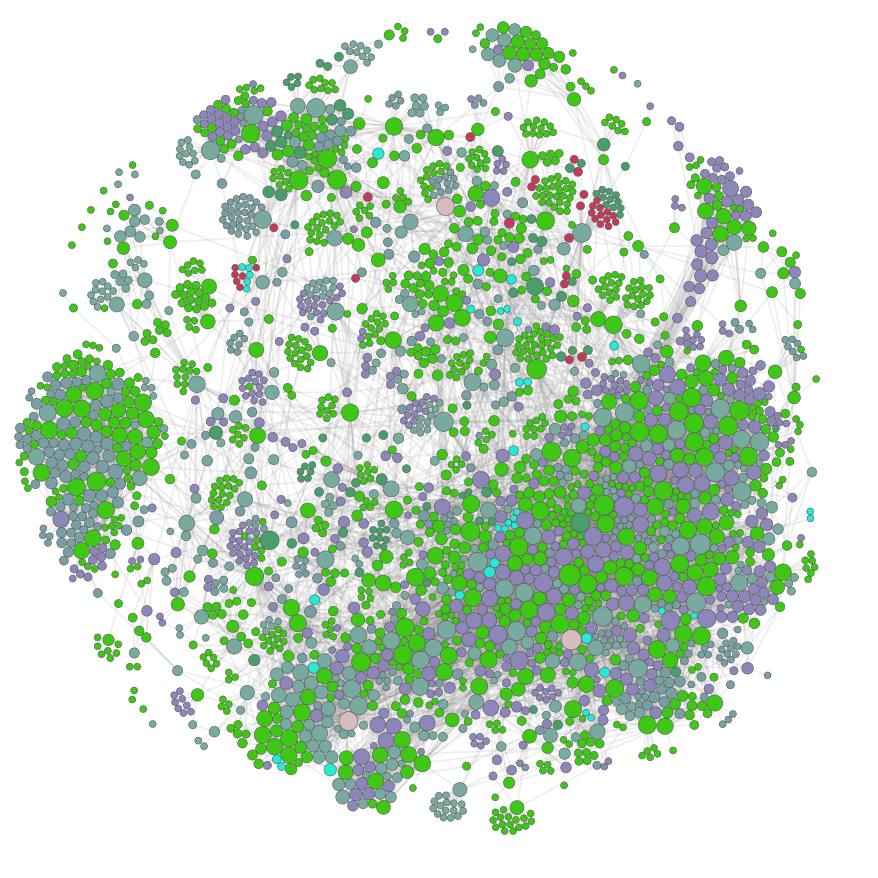

In [388]:
fig, ax = nw.draw_netwulf(stylized_network, figsize=12)